# **Laboratorio 3**
**Daniela Navas**

## **Task 1** - Preguntas Teóricas

**Responda a cada de las siguientes preguntas de forma clara y lo más completamente posible.**<br>

**1. Explique la diferencia entre descenso de gradiente, descenso de gradiente por mini batches y descenso de gradiente estocástico. Asegúrese de mencionar las ventajas y desventajas de cada enfoque.**<br>
El descenso de gradiente es un algoritmo fundamental en el aprendizaje automático utilizado para minimizar la función de costo en modelos. Existen tres variantes principales:<br>
- **Descenso de Gradiente:** Este algoritmo utiliza todo el conjunto de datos para calcular el gradiente en cada iteración. Actualiza los parámetros del modelo después de procesar todos los ejemplos del conjunto de entrenamiento. Tiene como **ventajas** que proporciona una estimación precisa del gradiente y converge a un mínimo estable. Y como **desventajas** que puede ser lento para grandes conjuntos de datos y requiere mucha memoria.
- **Descenso de Gradiente Estocástico:** Utiliza un ejemplo aleatorio del conjunto de datos en cada iteración para actualizar los parámetros. Tiene como **ventajas** ser rápido y eficiente computacionalmente y que ayuda a escapar de mínimos locales debido a su naturaleza ruidosa. Y como **desventajas** que las actualizaciones pueden ser ruidosas, lo que puede llevar a una convergencia errática.
- **Descenso de Gradiente por Mini Batches:** Divide el conjunto de datos en lotes pequeños (mini batches) y actualiza los parámetros después del cálculo del gradiente sobre cada mini lote. Tiene como **ventajas** se equilibra la estabilidad con la velocidad y reduce la variabilidad comparado con SGD mientras mantiene cierta eficiencia computacional. Y como **desventajas** que requiere ajuste fino del tamaño del mini lote.


**2. Compare y contraste técnicas de extracción de features (feature extraction)  y selección de features (feature selection) en machine learning. De ejemplos de escenarios donde cada técnica sería más apropiada.**<br>
**_Extracción de Features (Feature Extraction)_**<br>
Transforma los datos originales en un nuevo conjunto de features, generalmente de menor dimensión. Algunos **ejemplos** son PCA (Análisis de Componentes Principales), t-SNE, autoencoders. Tiene como **ventajas** que puede reducir la dimensionalidad y eliminar redundancias, mejora la interpretabilidad y la eficiencia del modelo. Y como **desventajas** que puede ser complejo y requerir un conocimiento profundo del dominio.
La transformación puede perder información relevante. Sus **escenarios apropiados** son cuando se trabaja con datos de alta dimensionalidad y en problemas donde la reducción de dimensionalidad es crucial para la eficiencia.

**_Selección de Features (Feature Selection)_**<br>
Selecciona un subconjunto de features relevantes del conjunto de datos original sin transformarlos. Algunos **ejemplos** son selección basada en la importancia de features, selección basada en correlación, métodos de selección secuencial. Tiene como **ventajas** que mantiene la interpretabilidad de los datos originales y puede mejorar el rendimiento del modelo al eliminar features irrelevantes o redundantes. Y como **desventajas** que puede no ser tan efectiva en la reducción de dimensionalidad como la extracción de features y requiere criterios claros para la selección. Sus **escenarios apropiados** son cuando se desea mantener la interpretabilidad de los datos originales y en problemas donde algunas features pueden ser irrelevantes o redundantes.

**3. Describa la arquitectura y el funcionamiento de un perceptrón de una sola capa (un tipo de red neuronal sin backpropagation). Explique cómo aprende y la forma en la que actualiza sus parámetros.**<br>
Un perceptrón simple es una red neuronal artificial básica compuesta por una capa única que aprende mediante reglas simples sin utilizar backpropagation tradicionalmente asociada con redes neuronales profundas modernas.

Su **_arquitectura_** se basa en:
- **Entradas:** Son valores numéricos representando información inicial que alimentan al modelo.
- **Pesos:** Cada entrada tiene un peso asociado que refleja su importancia relativa durante la predicción final.
- **Umbral/Bias:** Un valor adicional utilizado junto con las entradas ponderadas antes aplicarse activaciones lineales o no lineales simples como paso umbral binario ("Heaviside").
- **Salida:** El resultado final basado en si superó cierto umbral determinado por combinaciones ponderadas más bias ajustados durante entrenamientos iterativos usando reglas heurísticas sencillas basándose diferencias observables entre predicciones esperadas versus reales obtenidas tras probar distintos pesos hasta converger hacia soluciones óptimas dentro limitantes impuestos tanto matemáticos cómo empíricamente validables según contexto específico problema abordado.

El **aprendizaje** ocurre mediante ajustes graduales basados directamente observando desviaciones sistemáticas entre salidas esperadas versus reales generando así retroalimentación positiva/negativa según sea necesario hasta lograr equilibrio deseable conforme criterios evaluativos definidos previamente. Los pesos se ajustan para minimizar el error entre la salida deseada y la salida predicha y por medio de iteración se repite para múltiples veces hasta que el error se minimice o se alcance un número máximo de iteraciones.

## **Task 2** -  Ejercicios Prácticos<br>
Use Python en Jupyter Notebook para resolver los siguientes problemas relacionados a los temas que se vieron en clase. Asegúrese de citar todas las fuentes que utilice.

### **Task 2.1** - Gradiente Descendiente Estocástico<br> 
Implemente el descenso de gradiente estocástico, el descenso de gradiente y el descenso de gradiente por mini batches para una función polinómica de grado 3. Luego, grafique la función aproximada por cada uno de los métodos solicitados y la distribución real de puntos. Para esto considere que: 
- El polinomio que debe usar es $ \mathbf{ 2x^3 - 3x^2 + 5x + 3} $  
- Considere el uso de *np.polyval*
- Considere el uso de *np.polyder* 
- Compare el tiempo de ejecución de cada uno de los métodos solicitados. De esto, mencione cuál método fue más rápido y por qué.  
- Compare el fitness de cada método solicitado (recuerde hacer una evaluación numérica y no sólo visual). De 
esto mencione cuál método lo hizo mejor y por qué

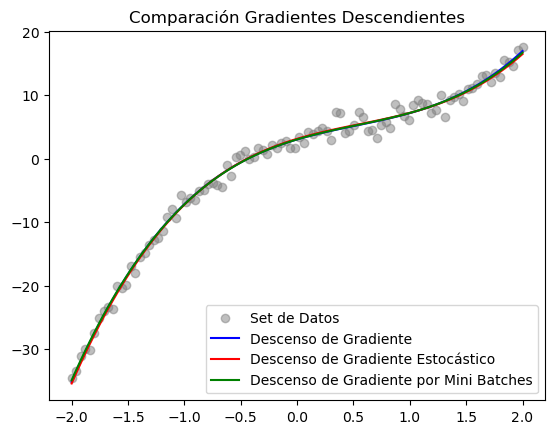

Descenso de Gradiente
Tiempo: 0.0280s, Fitness (MSE): 1.0865
______________________________________________
Descenso de Gradiente Estocástico
Tiempo: 1.1952s, Fitness (MSE): 1.1087
______________________________________________
Descenso de Gradiente por Mini Batches
Tiempo: 0.0909s, Fitness (MSE): 1.0903
______________________________________________


In [43]:
# LIBRERIAS 
import numpy as np
import matplotlib.pyplot as plt
import time

# Definir polinomio y derivada con polyder 
coeficientes = [2, -3, 5, 3]
derivada = np.polyder(coeficientes)

# Matriz de datos para prueba de las gradientes usando polyval
def generar_datos(n=100, ruido=1.0):
    x = np.linspace(-2, 2, n)
    y = np.polyval(coeficientes, x) + np.random.normal(0, ruido, n)
    return x, y

x, y = generar_datos()

# Función de costo - Error Cuadrático Medio
def costo(y_real, y_pred):
    return np.mean((y_real - y_pred) ** 2)

# Descenso de gradiente ------------------------------------------------------------------------------
def descenso_gradiente(x, y, lr, epochs):
    theta = np.random.randn(4)  # Coeficientes iniciales definimos de forma aleatoria
    n = len(x)
    x_pot = np.vstack([x**3, x**2, x, np.ones(n)]).T
    historial_costos = []
    
    for _ in range(epochs):
        pred = x_pot @ theta  # Predicción con los coeficientes actuales
        gradiente = -2/n * x_pot.T @ (y - pred)  # Gradiente de la función de error
        theta -= lr * gradiente  # Actualización de coeficientes
        historial_costos.append(costo(y, pred))
    
    return theta, historial_costos

# Descenso de gradiente estocástico -------------------------------------------------------------------
def descenso_gradiente_estocastico(x, y, lr, epochs):
    theta = np.random.randn(4)
    n = len(x)
    x_pot = np.vstack([x**3, x**2, x, np.ones(n)]).T
    historial_costos = []
    
    for _ in range(epochs):
        for i in range(n):
            xi = x_pot[i, :].reshape(1, -1)  # Un solo punto de datos
            yi = y[i]
            pred = xi @ theta  # Predicción
            gradiente = -2 * xi.T * (yi - pred)  # Gradiente solo con ese punto
            theta -= lr * gradiente.flatten()  # Actualización inmediata
        historial_costos.append(costo(y, x_pot @ theta))
    
    return theta, historial_costos

# Descenso de gradiente por mini batches ---------------------------------------------------------------
def descenso_gradiente_minibatch(x, y, lr, epochs, batch_size):
    theta = np.random.randn(4)
    n = len(x)
    x_pot = np.vstack([x**3, x**2, x, np.ones(n)]).T
    historial_costos = []
    
    for _ in range(epochs):
        indices = np.random.permutation(n) # Mezcla los datos
        x_shuffled, y_shuffled = x_pot[indices], y[indices]
        
        for i in range(0, n, batch_size):
            xb = x_shuffled[i:i+batch_size]  # Mini-lote de datos
            yb = y_shuffled[i:i+batch_size]
            pred = xb @ theta
            gradiente = -2/len(yb) * xb.T @ (yb - pred)  # Gradiente del mini-lote
            theta -= lr * gradiente  # Actualización de coeficientes
        historial_costos.append(costo(y, x_pot @ theta))
    
    return theta, historial_costos

# Definir Learning Rate (lr), épocas y tamaño de bache (Para gradiente por mini batches) 
lr = 0.01
epochs = 1000
batch_size=10

# Ejecución de métodos y toma de tiempo usando time()
start = time.time()
theta_gd, cost_gd = descenso_gradiente(x, y, lr, epochs)
time_gd = time.time() - start

start = time.time()
theta_sgd, cost_sgd = descenso_gradiente_estocastico(x, y, lr, epochs)
time_sgd = time.time() - start

start = time.time()
theta_mbg, cost_mbg = descenso_gradiente_minibatch(x, y, lr, epochs, batch_size)
time_mbg = time.time() - start

# Evaluación de Costo
fitness_gd = costo(y, np.polyval(theta_gd, x))
fitness_sgd = costo(y, np.polyval(theta_sgd, x))
fitness_mbg = costo(y, np.polyval(theta_mbg, x))

# Graficar los datos en comparación con los gradientes
plt.scatter(x, y, label='Set de Datos', color='gray', alpha=0.5)
x_fit = np.linspace(-2, 2, 100)
plt.plot(x_fit, np.polyval(theta_gd, x_fit), label='Descenso de Gradiente', color='blue')
plt.plot(x_fit, np.polyval(theta_sgd, x_fit), label='Descenso de Gradiente Estocástico', color='red')
plt.plot(x_fit, np.polyval(theta_mbg, x_fit), label='Descenso de Gradiente por Mini Batches', color='green')
plt.title('Comparación Gradientes Descendientes')
plt.legend()
plt.show()

# Mostrar resultados
print("Descenso de Gradiente")
print(f"Tiempo: {time_gd:.4f}s, Fitness (MSE): {fitness_gd:.4f}")
print("______________________________________________")
print("Descenso de Gradiente Estocástico")
print(f"Tiempo: {time_sgd:.4f}s, Fitness (MSE): {fitness_sgd:.4f}")
print("______________________________________________")
print("Descenso de Gradiente por Mini Batches")
print(f"Tiempo: {time_mbg:.4f}s, Fitness (MSE): {fitness_mbg:.4f}")
print("______________________________________________")


Después de realizar múltiples iteraciones, se determinó que el mejor modelo fue el **Descenso de Gradiente**, ya que obtuvo el tiempo de ejecución más bajo (0.0280s) y el fitness más alto, con un MSE de 1.0865, lo que indica un mejor ajuste del modelo a los datos reales. Esto se debe a que el Descenso de Gradiente actualiza los coeficientes del polinomio de manera más eficiente en comparación con el Descenso de Gradiente Estocástico y el Descenso de Gradiente por Mini Batches, usa todo el conjunto de datos en cada iteración, lo que reduce la variabilidad en los ajustes y permite una convergencia más rápida en este caso.

---

### **Task 2.2** - Feature Selection<br> 
Tome de nuevo el dataset del laboratorio pasado referente a la clasificación de Partidas de League of Legends. Recuerde que lo puede descargar de este enlace. Sobre este aplique al menos 3 técnicas de feature selection distintas, y con el dataset resultante vuelva a ajustar el modelo de Support Vector Machine (de la librería Sklearn). 

Recuerde que: 
- Debe definir una métrica de desempeño y justificar el por qué de esta métrica 
- Mida el performance de su modelo con las tres técnicas de feature selection y compare cada una de ellas. Es decir, debe tener al menos 4 valores a comparar (el obtenido en el laboratorio pasado, y al menos 3 de las técnicas de feature selection) 
- De las medidas obtenidas, diga qué versión lo hizo mejor y por qué. 
- Recuerde que para hacer parameter tuning, deben usar las mismas columnas seleccionadas después del feature selection 
- Recuerde que su variable objetivo es “blueWins” 

In [1]:
# Importar librerias
import pandas as pd
from sklearn.model_selection import train_test_split

# Importar base de datos
high_diamond_ranked_10min = pd.read_csv('high_diamond_ranked_10min.csv', delimiter=",", header='infer')

# Revisar la distribución de las clases
print("Distribución de las clases:")
print(high_diamond_ranked_10min['blueWins'].value_counts())  
print("-----------------------------------------------------")

# Revisar que todas las observaciones tengan la cantidad adecuada de variables (38 de acuerdo a la documentación)
column_length = len(high_diamond_ranked_10min.columns)

# Filtrar las filas con el número adecuado de columnas
valid_rows = high_diamond_ranked_10min[high_diamond_ranked_10min.apply(lambda row: len(row) == column_length, axis=1)]

# Contar cuántas filas fueron eliminadas
rows_deleted = len(high_diamond_ranked_10min) - len(valid_rows)

print(f"Cantidad de observaciones con variables incompletas: {rows_deleted}")
print("-----------------------------------------------------")

# Eliminar las filas con variables incompletas
high_diamond_ranked_10min = valid_rows

# Convertir variable "blueWins" en -1 para perdidas (0) y 1 para ganadas (1)
high_diamond_ranked_10min['blueWins'] = high_diamond_ranked_10min['blueWins'].replace({0: -1, 1 : 1})

# Dividir en 80% training y 20% temporal
train_set, temp_set = train_test_split(high_diamond_ranked_10min, test_size=0.2, random_state=42)

# Ahora dividir la porción de 20% en 50% para validación y 50% para test
val_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=42)

# Verificar las dimensiones de los conjuntos resultantes
print(f"Dimesiones Data Training (80%): {train_set.shape}")
print(f"Dimesiones Data Testing (10%): {test_set.shape}")
print(f"Dimesiones Data Validation (10%): {val_set.shape}")
print("-----------------------------------------------------")

print("Distribución de las clases Data Training:")
print(train_set['blueWins'].value_counts())  
print("-----------------------------------------------------")

print("Distribución de las clases Data Testing:")
print(test_set['blueWins'].value_counts())  
print("-----------------------------------------------------")

print("Distribución de las clases Data Validation:")
print(val_set['blueWins'].value_counts())  
print("-----------------------------------------------------")

Distribución de las clases:
blueWins
0    4949
1    4930
Name: count, dtype: int64
-----------------------------------------------------
Cantidad de observaciones con variables incompletas: 0
-----------------------------------------------------
Dimesiones Data Training (80%): (7903, 40)
Dimesiones Data Testing (10%): (988, 40)
Dimesiones Data Validation (10%): (988, 40)
-----------------------------------------------------
Distribución de las clases Data Training:
blueWins
-1    3966
 1    3937
Name: count, dtype: int64
-----------------------------------------------------
Distribución de las clases Data Testing:
blueWins
-1    505
 1    483
Name: count, dtype: int64
-----------------------------------------------------
Distribución de las clases Data Validation:
blueWins
 1    510
-1    478
Name: count, dtype: int64
-----------------------------------------------------


Revisión de la base de datos para asegurar que este en condiciones óptimas para usarse con el modelo, consiste en 40 variables y 9879 observaciones. De las cuales, hay dos variables que indican si el equipo ganador es el rojo o azul, la variable de interes es *"blueWins"*, que se intentará clasificar con el modelo. En total, hay 19 características por equipo, lo que suma 38 características en total. Estos datos se recopilan después de 10 minutos de juego.  

La base está balanceada con un 49.90% de datos *blueWins*, además se revisan todas las observaciones determinando que no hay ninguna con datos vacíos o incompletos, por ende no es necesario eliminar ninguna observación. Cuando se divide la base en tres subconjuntos diferentes, se verifica que la proporción se mantiene más o menos igual, es decir, en un rango balanceado.

---

#### **Sin Feature Selection - Lab2**<br> 

Mejor valor de C: 0.006 con precisión en validación: 72.67206477732793% 

Matriz de confusión:
TP: 356, FP: 138
FN: 127, TN: 367
------------------------------------------
Precisión: 73.17813765182186 %
Sensibilidad: 73.70600414078675 %
Especificidad: 72.67326732673267 %


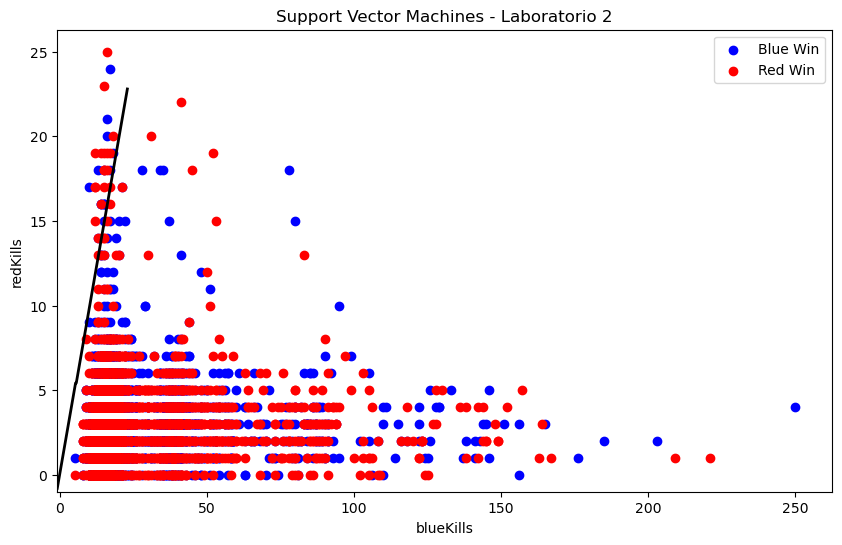

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# ********************************************
# SIN FEATURE SELECTION - LAB2 
# ********************************************

# Variables del df que se usan en el modelo
features = ['blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']

# Extraer datos de la base ya dividida en subsets para entrenamiento, validación y testeo
X_train = train_set[features].values    
y_train = train_set['blueWins'].values  

X_validation = val_set[features].values    
y_validation = val_set['blueWins'].values  

X_test = test_set[features].values         
y_test = test_set['blueWins'].values       

# Tuning para hiperparámetro C
C_values = [0.005, 0.006, 0.007]
best_C = None
best_accuracy = 0

for C in C_values:
    svm_model = SVC(kernel='linear', C=C)
    svm_model.fit(X_train, y_train)
    
    y_pred_val = svm_model.predict(X_validation)
    accuracy_val = accuracy_score(y_validation, y_pred_val)
    
    if accuracy_val > best_accuracy:
        best_accuracy = accuracy_val
        best_C = C

print(f"Mejor valor de C: {best_C} con precisión en validación: {best_accuracy*100}% \n")

# Primera Prueba: C_values = [0.01, 0.1, 1, 10, 100] -> Con ello se obtuvo un mejor feat con 0.01 con 72.57085020242914%
# Segunda Prueba: C_values = [0.005, 0.006, 0.007, 0.008, 0.009, 0.01] -> Con ello se obtuvo un mejor feat con 0.006 con con 72.67206477732793%
# Se usa C = 0.006 | C_values = [0.005, 0.006, 0.007]

# Entrenar el modelo final con el mejor C en el conjunto completo de entrenamiento
svm_model = SVC(kernel='linear', C=best_C)
svm_model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred_test = svm_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix_Lib = confusion_matrix(y_test, y_pred_test)
TN_SVM_Lib, FP_SVM_Lib, FN_SVM_Lib, TP_SVM_Lib = conf_matrix_Lib.ravel()

# Calcular métricas
precision_SVM_Lib = accuracy_score(y_test, y_pred_test)
sensibilidad_SVM_Lib = TP_SVM_Lib / (TP_SVM_Lib + FN_SVM_Lib) if (TP_SVM_Lib + FN_SVM_Lib) > 0 else 0
especificidad_SVM_Lib = TN_SVM_Lib / (TN_SVM_Lib + FP_SVM_Lib) if (TN_SVM_Lib + FP_SVM_Lib) > 0 else 0

print("Matriz de confusión:")
print(f"TP: {TP_SVM_Lib}, FP: {FP_SVM_Lib}")
print(f"FN: {FN_SVM_Lib}, TN: {TN_SVM_Lib}")
print("------------------------------------------")

print("Precisión:", precision_SVM_Lib*100, "%")
print("Sensibilidad:", sensibilidad_SVM_Lib*100, "%")
print("Especificidad:", especificidad_SVM_Lib*100, "%")

# GRAFICAR
X_train_vis = train_set[['blueKills', 'redKills']].values

# Entrenar el modelo SVM con scikit-learn con 2 variables para graficar
svm_model.fit(X_train_vis, y_train)

# Crear la malla para la gráfica
x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predecir valores en la malla
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar los datos y la frontera de decisión
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='b', label='Blue Win')
plt.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1], color='r', label='Red Win')

plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=2)

plt.xlabel('blueKills')
plt.ylabel('redKills')
plt.title('Support Vector Machines - Laboratorio 2')
plt.legend()
plt.show()


---

#### **Técnica 1: Variance Treshold**<br> 

Features seleccionadas:
 ['blueWardsPlaced' 'blueWardsDestroyed' 'blueFirstBlood' 'blueKills'
 'blueDeaths' 'blueAssists' 'blueEliteMonsters' 'blueDragons'
 'blueHeralds' 'blueTotalGold' 'blueTotalExperience'
 'blueTotalMinionsKilled' 'blueTotalJungleMinionsKilled' 'blueGoldDiff'
 'blueExperienceDiff' 'blueCSPerMin' 'blueGoldPerMin' 'redWardsPlaced'
 'redWardsDestroyed' 'redFirstBlood' 'redKills' 'redDeaths' 'redAssists'
 'redEliteMonsters' 'redDragons' 'redHeralds' 'redTotalGold'
 'redTotalExperience' 'redTotalMinionsKilled'
 'redTotalJungleMinionsKilled' 'redGoldDiff' 'redExperienceDiff'
 'redCSPerMin' 'redGoldPerMin']
Mejor valor de C: 0.005 con precisión en validación: 72.46963562753037% 

Matriz de confusión:
TP: 347, FP: 124
FN: 136, TN: 381
------------------------------------------
Precisión: 73.68421052631578 %
Sensibilidad: 71.84265010351967 %
Especificidad: 75.44554455445545 %


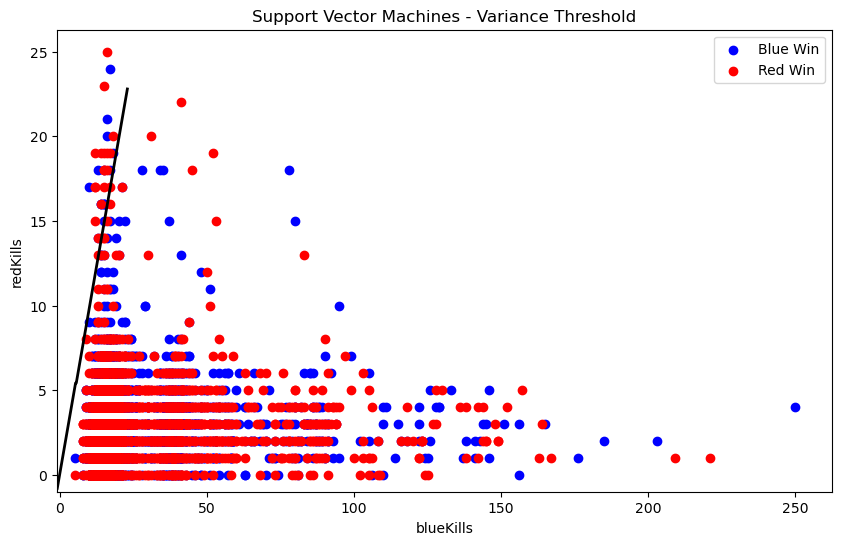

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import VarianceThreshold

# ********************************************
# 1. VARIANCE THRESHOLD
# ********************************************

# Variables del df 
features = ['blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']

# Extraer datos de la base ya dividida en subsets para entrenamiento, validación y testeo
X_train = train_set[features].values    
y_train = train_set['blueWins'].values  

X_validation = val_set[features].values    
y_validation = val_set['blueWins'].values  

X_test = test_set[features].values         
y_test = test_set['blueWins'].values

# Técnica 1: Variance Threshold
var_threshold = VarianceThreshold(threshold=0.1)  # Eliminar características con varianza baja
X_train_var = var_threshold.fit_transform(X_train)
X_validation_var = var_threshold.transform(X_validation)
X_test_var = var_threshold.transform(X_test)

# Asegurarnos de que aplicamos la selección de características sobre el conjunto correcto
selected_features = np.array(features)[var_threshold.get_support(indices=True)]
print("Features seleccionadas:\n", selected_features)

X_train = train_set[selected_features].values    
y_train = train_set['blueWins'].values  

X_validation = val_set[selected_features].values    
y_validation = val_set['blueWins'].values  

X_test = test_set[selected_features].values         
y_test = test_set['blueWins'].values 

# Tuning para hiperparámetro C
C_values = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006]
best_C = None
best_accuracy = 0

for C in C_values:
    svm_model = SVC(kernel='linear', C=C)
    svm_model.fit(X_train, y_train)
    
    y_pred_val = svm_model.predict(X_validation)
    accuracy_val = accuracy_score(y_validation, y_pred_val)
    
    if accuracy_val > best_accuracy:
        best_accuracy = accuracy_val
        best_C = C

print("=====================================================")
print(f"Mejor valor de C: {best_C} con precisión en validación: {best_accuracy*100}% \n")

# Primera Prueba: C_values = [0.01, 0.1, 1, 10, 100] -> Con ello se obtuvo un mejor feat con 0.01 con 72.57085020242914%
# Segunda Prueba: C_values = [0.005, 0.006, 0.007, 0.008, 0.009, 0.01] -> Con ello se obtuvo un mejor feat con 0.005 con con 69.63562753036437% %
# Se usa C = 0.005 | C_values = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006]

# Entrenar el modelo final con el mejor C en el conjunto completo de entrenamiento
svm_model = SVC(kernel='linear', C=best_C)
svm_model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred_test = svm_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix_Lib = confusion_matrix(y_test, y_pred_test)
TN_SVM_Lib, FP_SVM_Lib, FN_SVM_Lib, TP_SVM_Lib = conf_matrix_Lib.ravel()

# Calcular métricas
precision_SVM_Lib = accuracy_score(y_test, y_pred_test)
sensibilidad_SVM_Lib = TP_SVM_Lib / (TP_SVM_Lib + FN_SVM_Lib) if (TP_SVM_Lib + FN_SVM_Lib) > 0 else 0
especificidad_SVM_Lib = TN_SVM_Lib / (TN_SVM_Lib + FP_SVM_Lib) if (TN_SVM_Lib + FP_SVM_Lib) > 0 else 0

print("=====================================================")
print("Matriz de confusión:")
print(f"TP: {TP_SVM_Lib}, FP: {FP_SVM_Lib}")
print(f"FN: {FN_SVM_Lib}, TN: {TN_SVM_Lib}")
print("------------------------------------------")

print("Precisión:", precision_SVM_Lib*100, "%")
print("Sensibilidad:", sensibilidad_SVM_Lib*100, "%")
print("Especificidad:", especificidad_SVM_Lib*100, "%")

# GRAFICAR
X_train_vis = train_set[['blueKills', 'redKills']].values

# Entrenar el modelo SVM con scikit-learn con 2 variables para graficar
svm_model.fit(X_train_vis, y_train)

# Crear la malla para la gráfica
x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predecir valores en la malla
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar los datos y la frontera de decisión
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='b', label='Blue Win')
plt.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1], color='r', label='Red Win')

plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=2)

plt.xlabel('blueKills')
plt.ylabel('redKills')
plt.title('Support Vector Machines - Variance Threshold')
plt.legend()
plt.show()

---

#### **Técnica 2: Selección Basada en Random Forest**<br> 

Features seleccionadas:
 ['blueTotalGold' 'blueTotalExperience' 'blueGoldDiff' 'blueExperienceDiff'
 'blueGoldPerMin' 'redTotalGold' 'redTotalExperience' 'redGoldDiff'
 'redExperienceDiff' 'redGoldPerMin']
Mejor valor de C: 0.002 con precisión en validación: 72.57085020242914% 

_________________________________________________________________________________________
Matriz de confusión:
TP: 346, FP: 131
FN: 137, TN: 374
------------------------------------------
Precisión: 72.8744939271255 %
Sensibilidad: 71.63561076604555 %
Especificidad: 74.05940594059406 %


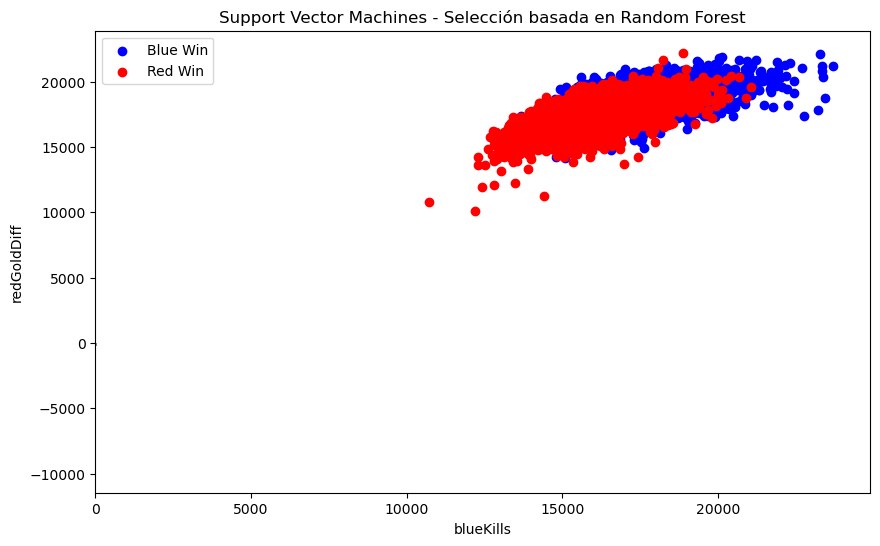

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# ********************************************
# 2. BASADO EN RANDOM FOREST
# ********************************************

# Variables del df 
features = ['blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']

# Extraer datos de la base ya dividida en subsets para entrenamiento, validación y testeo
X_train = train_set[features].values    
y_train = train_set['blueWins'].values  

X_validation = val_set[features].values    
y_validation = val_set['blueWins'].values  

X_test = test_set[features].values         
y_test = test_set['blueWins'].values

# Técnica 2: Selección basada en el modelo RandomForest
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)
selector_rf = SelectFromModel(model_rf, threshold="mean", max_features=10)

# Asegurarnos de que aplicamos la selección de características sobre el conjunto correcto
selected_features = np.array(features)[selector_rf.get_support(indices=True)]
print("Features seleccionadas:\n", selected_features)

X_train = train_set[selected_features].values    
y_train = train_set['blueWins'].values  

X_validation = val_set[selected_features].values    
y_validation = val_set['blueWins'].values  

X_test = test_set[selected_features].values         
y_test = test_set['blueWins'].values 

# Tuning para hiperparámetro C
C_values = [0.001, 0.002, 0.003, 0.004, 0.005]
best_C = None
best_accuracy = 0

for C in C_values:
    svm_model = SVC(kernel='linear', C=C)
    svm_model.fit(X_train, y_train)
    
    y_pred_val = svm_model.predict(X_validation)
    accuracy_val = accuracy_score(y_validation, y_pred_val)
    
    if accuracy_val > best_accuracy:
        best_accuracy = accuracy_val
        best_C = C

print("=====================================================")
print(f"Mejor valor de C: {best_C} con precisión en validación: {best_accuracy*100}% \n")

# Primera Prueba: C_values = [0.01, 0.1, 1, 10, 100] -> Con ello se obtuvo un mejor feat con 0.01 con 72.57085020242914%
# Segunda Prueba: C_values = [0.005, 0.006, 0.007, 0.008, 0.009, 0.01] -> Con ello se obtuvo un mejor feat con 0.005 con con 69.63562753036437% %
# Se usa C = 0.002 | C_values = [0.001, 0.002, 0.003, 0.004, 0.005]

# Entrenar el modelo final con el mejor C en el conjunto completo de entrenamiento
svm_model = SVC(kernel='linear', C=best_C)
svm_model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred_test = svm_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix_Lib = confusion_matrix(y_test, y_pred_test)
TN_SVM_Lib, FP_SVM_Lib, FN_SVM_Lib, TP_SVM_Lib = conf_matrix_Lib.ravel()

# Calcular métricas
precision_SVM_Lib = accuracy_score(y_test, y_pred_test)
sensibilidad_SVM_Lib = TP_SVM_Lib / (TP_SVM_Lib + FN_SVM_Lib) if (TP_SVM_Lib + FN_SVM_Lib) > 0 else 0
especificidad_SVM_Lib = TN_SVM_Lib / (TN_SVM_Lib + FP_SVM_Lib) if (TN_SVM_Lib + FP_SVM_Lib) > 0 else 0

print("_________________________________________________________________________________________")
print("Matriz de confusión:")
print(f"TP: {TP_SVM_Lib}, FP: {FP_SVM_Lib}")
print(f"FN: {FN_SVM_Lib}, TN: {TN_SVM_Lib}")
print("------------------------------------------")

print("Precisión:", precision_SVM_Lib*100, "%")
print("Sensibilidad:", sensibilidad_SVM_Lib*100, "%")
print("Especificidad:", especificidad_SVM_Lib*100, "%")

# GRAFICAR
X_train_vis = train_set[['blueKills', 'redGoldDiff']].values

# Entrenar el modelo SVM con scikit-learn con 2 variables para graficar
svm_model.fit(X_train_vis, y_train)

# Crear la malla para la gráfica
x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predecir valores en la malla
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar los datos y la frontera de decisión
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='b', label='Blue Win')
plt.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1], color='r', label='Red Win')

plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=2)

plt.xlabel('blueKills')
plt.ylabel('redGoldDiff')
plt.title('Support Vector Machines - Selección basada en Random Forest')
plt.legend()
plt.show()

---

#### **Técnica 3: Selección Basada en Correlación de Variables Independientes**<br> 

Features seleccionadas:
 ['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff', 'redWardsPlaced', 'redWardsDestroyed', 'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled']
Mejor valor de C: 0.003 con precisión en validación: 73.27935222672065% 

_________________________________________________________________________________________
Matriz de confusión:
TP: 358, FP: 136
FN: 125, TN: 369
------------------------------------------
Precisión: 73.582995951417 %
Sensibilidad: 74.12008281573499 %
Especificidad: 73.06930693069307 %


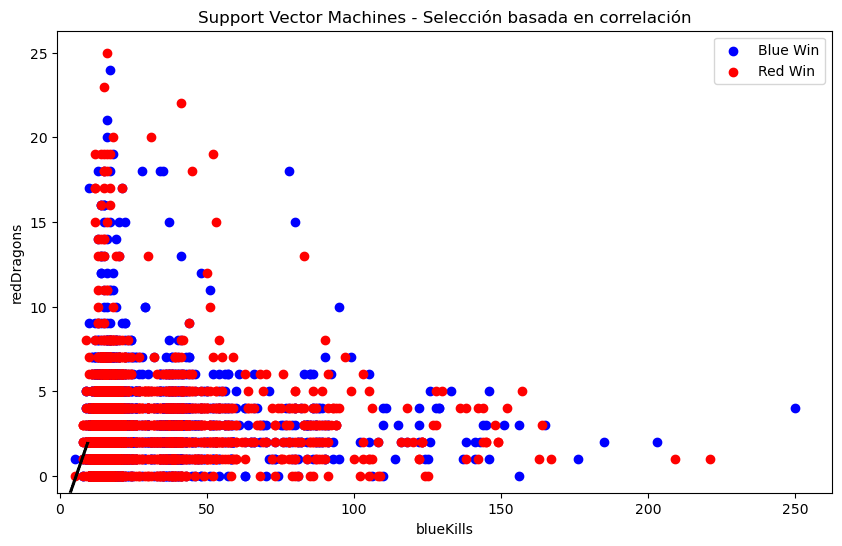

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# ********************************************
# 1. CORRELACIÓN DE VARIABLES INDEPENDIENTES
# ********************************************

# Variables del df 
features = ['blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']

# Extraer datos de la base ya dividida en subsets para entrenamiento, validación y testeo
X_train = train_set[features].values    
y_train = train_set['blueWins'].values  

X_validation = val_set[features].values    
y_validation = val_set['blueWins'].values  

X_test = test_set[features].values         
y_test = test_set['blueWins'].values

# Técnica 3: Selección basada en correlación
# Crear un DataFrame temporal con las características de entrenamiento
df_train = pd.DataFrame(X_train, columns=features)

# Calcular la matriz de correlación
correlation_matrix = df_train.corr().abs()

# Encontrar pares de características con correlación mayor a 0.9
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

# Filtrar las características
selected_features = [feature for feature in features if feature not in to_drop]
print("Features seleccionadas:\n", selected_features)

X_train = train_set[selected_features].values    
y_train = train_set['blueWins'].values  

X_validation = val_set[selected_features].values    
y_validation = val_set['blueWins'].values  

X_test = test_set[selected_features].values         
y_test = test_set['blueWins'].values 

# Tuning para hiperparámetro C
C_values = [0.001, 0.002, 0.003, 0.004, 0.005]
best_C = None
best_accuracy = 0

for C in C_values:
    svm_model = SVC(kernel='linear', C=C)
    svm_model.fit(X_train, y_train)
    
    y_pred_val = svm_model.predict(X_validation)
    accuracy_val = accuracy_score(y_validation, y_pred_val)
    
    if accuracy_val > best_accuracy:
        best_accuracy = accuracy_val
        best_C = C

print("=====================================================")
print(f"Mejor valor de C: {best_C} con precisión en validación: {best_accuracy*100}% \n")

# Primera Prueba: C_values = [0.01, 0.1, 1, 10, 100] -> Con ello se obtuvo un mejor feat con 0.01 con 72.57085020242914%
# Segunda Prueba: C_values = [0.005, 0.006, 0.007, 0.008, 0.009, 0.01] -> Con ello se obtuvo un mejor feat con 0.005 con con 69.63562753036437% %
# Se usa C = 0.003 | C_values = [0.001, 0.002, 0.003, 0.004, 0.005]

# Entrenar el modelo final con el mejor C en el conjunto completo de entrenamiento
svm_model = SVC(kernel='linear', C=best_C)
svm_model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred_test = svm_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix_Lib = confusion_matrix(y_test, y_pred_test)
TN_SVM_Lib, FP_SVM_Lib, FN_SVM_Lib, TP_SVM_Lib = conf_matrix_Lib.ravel()

# Calcular métricas
precision_SVM_Lib = accuracy_score(y_test, y_pred_test)
sensibilidad_SVM_Lib = TP_SVM_Lib / (TP_SVM_Lib + FN_SVM_Lib) if (TP_SVM_Lib + FN_SVM_Lib) > 0 else 0
especificidad_SVM_Lib = TN_SVM_Lib / (TN_SVM_Lib + FP_SVM_Lib) if (TN_SVM_Lib + FP_SVM_Lib) > 0 else 0

print("_________________________________________________________________________________________")
print("Matriz de confusión:")
print(f"TP: {TP_SVM_Lib}, FP: {FP_SVM_Lib}")
print(f"FN: {FN_SVM_Lib}, TN: {TN_SVM_Lib}")
print("------------------------------------------")

print("Precisión:", precision_SVM_Lib*100, "%")
print("Sensibilidad:", sensibilidad_SVM_Lib*100, "%")
print("Especificidad:", especificidad_SVM_Lib*100, "%")

# GRAFICAR
X_train_vis = train_set[['blueKills', 'redDragons']].values

# Entrenar el modelo SVM con scikit-learn con 2 variables para graficar
svm_model.fit(X_train_vis, y_train)

# Crear la malla para la gráfica
x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predecir valores en la malla
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar los datos y la frontera de decisión
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='b', label='Blue Win')
plt.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1], color='r', label='Red Win')

plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=2)

plt.xlabel('blueKills')
plt.ylabel('redDragons')
plt.title('Support Vector Machines - Selección basada en correlación')
plt.legend()
plt.show()

---

Al aplicar estas tres técnicas de **feature selection** y aplicar el modelo de SVM se obtienen las siguientes métricas:

|                   | Laboratorio 2 | Variance Threshold | RandomForest | Correlación |
|-------------------|---------------|--------------------|--------------|-------------|
|  **Precisión**    |     73.18%    |       73.68%       |    72.87%    |    73.58%   |
| **Sensibilidad**  |     73.71%    |       71.84%       |    71.64%    |    74.12%   |
| **Especificidad** |     72.67%    |       75.45%       |    74.06%    |    73.07%   |


- **De las medidas obtenidas, diga qué versión lo hizo mejor y por qué**<br>
La mejor versión del modelo es la que emplea **el método de selección por correlación**. Esto se debe a que obtuvo la mayor **sensibilidad (74.12%)**, lo que indica que identifica correctamente la mayor cantidad de casos positivos en comparación con las otras técnicas. Además, alcanzó una precisión del **73.58%**, apenas 0.1% menos que la mejor versión en este aspecto (Variance Threshold con 73.68%), pero con una sensibilidad significativamente mayor. Aunque la especificidad (73.07%) no es la más alta, se mantiene en un valor competitivo respecto a los demás métodos. Por lo tanto, el método basado en **correlación ofrece el mejor balance entre precisión, sensibilidad y especificidad**, optimizando el rendimiento del modelo sin sacrificar su capacidad de generalización. Se usan estas métricas ya que al ser un problema de clasificación con ellas se puede evaluar su capacidad de clasificar a todos los datos y además en detalle aquellos resultados óptimos correctamente clasificados y los que no, que pueden ser de interés en algunas aplicaciones específicas.

---

### **Task 2.3** - Perceptrón<br> 
Implemente un perceptrón de una sola capa para realizar una clasificación binaria del dataset de Iris(incluido en sklearn.datasets.load_iris). Visualice la frontera de decisión que fue aprendida por el perceptrón. 

Recuerde que: 
- Debe cargar el dataset de Iris desde la librería mencionada 
- Use solamente dos features, siendo estos sepal length y sepal width 
- Asegúrese de que su clase Perceptron tenga los métodos de fit y predict 
- Visualice la frontera de decisión 
    - El eje Y debería ser sepal width y el eje X debería ser sepal length
- Debe definir una métrica de desempeño y justificar el por qué de esta métrica. Con dicha métrica, evalúe el rendimiento de su modelo. Es decir, diga si lo hizo bien o no y el por qué. 

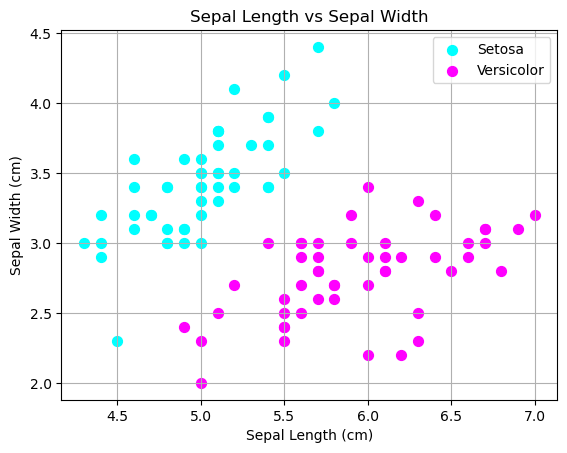

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Cargar base de datos
iris = load_iris()

# Convertir a un DF
data_df = pd.DataFrame(iris.data, columns=iris.feature_names)
data_df["target"] = iris.target

# Seleccion de Features
data_df = data_df[["sepal length (cm)", "sepal width (cm)", "target"]]

# Convertir en Clasificación Binaria (Setosa y Versicolor)
data_df = data_df[data_df["target"].isin([0,1])]
X1 = data_df[["sepal length (cm)", "sepal width (cm)"]].values
y1 =  data_df["target"].values
X1 = X1[y1 != 2]  
y1 = y1[y1 != 2]  
y1 = np.where(y1 == 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
perceptron = Perceptron(eta0=0.01, max_iter=1000)
perceptron.fit(X_train, y_train)
weights = perceptron.coef_[0]
bias = perceptron.intercept_[0]

# VISUALIZAR DATOS
plt.figure()

# Dividir en los dos grupos de clasificación
setosa_data = data_df[data_df["target"] == 0]
versicolor_data = data_df[data_df["target"] == 1]
         
# Graficar 
plt.scatter(setosa_data["sepal length (cm)"], setosa_data["sepal width (cm)"], label="Setosa", color="cyan", s=50)
plt.scatter(versicolor_data["sepal length (cm)"], versicolor_data["sepal width (cm)"], label="Versicolor", color="Magenta", s=50)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.grid()
plt.legend()
plt.show()

Visualización de la distribución de los datos, ahora se procede a realizar el Perceptron.

_________________________________________________________________________________________
Matriz de confusión:
TP: 8, FP: 0
FN: 0, TN: 12
------------------------------------------
Precisión: 100.00 %
Sensibilidad: 100.00 %
Especificidad: 100.00 %


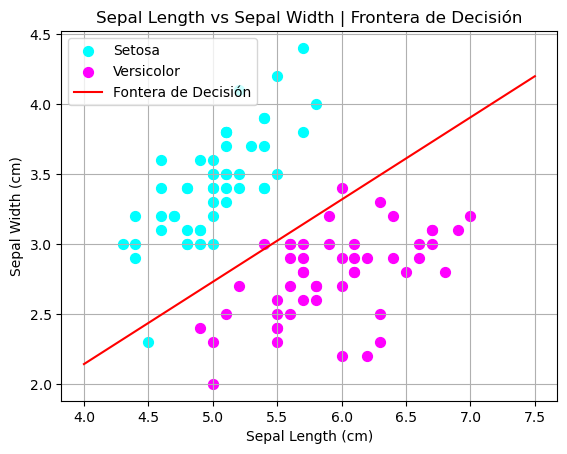

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Definición de la clase Perceptrón
class Perceptron:
    def __init__(self, learning_rate=0.09, n_iterations=10):
        self.learning_rate = learning_rate    # Tasa de aprendizaje
        self.n_iterations = n_iterations      # Número de iteraciones
        self.weights = None                   # Pesos iniciales
        self.bias = None                      # BIAS

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # Iniciar los pesos en 0s
        self.bias = 0                        # Iniciar BIAS en 0
        
        # Fase de Entrenamiento
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias  # Producto punto
                y_predicted = np.where(linear_output >= 0, 1, -1)      # Función escalón
                
                # Actualización de pesos y BIAS
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, -1)

# Cargar el dataset de Iris
data = datasets.load_iris()
X = data.data[:, :2]                  # Solo sepal length y sepal width | De acuerdo a documentación las primeras 2 columnas 
y = data.target                       # Target alamacena la información de interes

# Convertir a binario (clases 0 y 1)
X = X[y != 2]  # Eliminar la clase 2
y = y[y != 2]  # Mantener solo 0 y 1

# Convertir etiquetas a -1 y 1
y = np.where(y == 0, -1, 1)

# Dividir en conjunto data train (80) y test (20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar el perceptrón
perceptron = Perceptron(learning_rate=0.01, n_iterations=1000)
perceptron.fit(X_train, y_train)

# Hacer predicciones con el modelo
y_pred = perceptron.predict(X_test)

# MÉTRICAS
# Obtener la matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calcular métricas
precision_perceptron = accuracy_score(y_test, y_pred)
sensibilidad_perceptron = tp / (tp + fn) if (tp + fn) > 0 else 0
especificidad_perceptron = tn / (tn + fp) if (tn + fp) > 0 else 0

# Imprimir resultados
print("_________________________________________________________________________________________")
print("Matriz de confusión:")
print(f"TP: {tp}, FP: {fp}")
print(f"FN: {fn}, TN: {tn}")
print("------------------------------------------")

print(f"Precisión: {precision_perceptron * 100:.2f} %")
print(f"Sensibilidad: {sensibilidad_perceptron * 100:.2f} %")
print(f"Especificidad: {especificidad_perceptron * 100:.2f} %")

# VISUALIZAR
# Datos de iris setosa y versicolor
setosa_data = data_df[data_df["target"] == 0]
versicolor_data = data_df[data_df["target"] == 1]
         
# Graficar data 
plt.scatter(setosa_data["sepal length (cm)"], setosa_data["sepal width (cm)"], label="Setosa", color="cyan", s=50)
plt.scatter(versicolor_data["sepal length (cm)"], versicolor_data["sepal width (cm)"], label="Versicolor", color="Magenta", s=50)

# Dibujar la frontera
x_values = np.linspace (4, 7.5, 100) #(inicio, fin, número_de_puntos) 
y_values = (-weights[0] / weights[1])* x_values - bias / weights[1] 

plt.plot(x_values, y_values, '-r', label='Fontera de Decisión')
plt.title('Sepal Length vs Sepal Width | Frontera de Decisión')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.grid()
plt.legend()
plt.show()


**Debe definir una métrica de desempeño y justificar el por qué de esta métrica. Con dicha métrica, evalúe el rendimiento de su modelo. Es decir, diga si lo hizo bien o no y el por qué.**<br>
El modelo obtuvo precisión, sensibilidad y especificidad perfectas (100%), lo cual a primera vista parece ideal. Sin embargo, esto no siempre significa que el modelo sea completamente confiable. Se usan estas métricas porque en conjunto definen bastante bien la operación de un modelo, 
la **precisión** indica que todas las predicciones del modelo fueron correctas, la **sensibilidad** muestra que el modelo detectó todas las instancias positivas sin fallar y la **especificidad** significa que el modelo no cometió ningún falso positivo, es decir, no clasificó erróneamente instancias negativas como positivas.

Ahora bien, en cuanto a porque el modelo es "*perfecto*", considero podría deberse a que el dataset de Iris está limpio, bien balanceado y es fácil de clasificar. Fue diseñado para experimentos en Machine Learning, por lo que los datos están bien estructurados. No tiene ruido ni datos ambiguos, lo que facilita que un modelo como el Perceptrón logre una separación perfecta. Es importante probar el modelo con otro set de datos ya que no representa un caso realista, en la vida real, los datasets suelen tener ruido, datos faltantes, clases desbalanceadas o solapamiento entre clases. En esos casos, difícilmente se logra un 100% en todas las métricas.

---

### Link a Repositorio Github <br>
https://github.com/danielanavas2002/InteligenciaArtificial/tree/main/Laboratorio/Laboratorio03